## EDA

The main purpose of this notebook is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, find interesting relations among the variables.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

C:\Users\FPT Shop\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('..\\..\\data\\normalized\\apartment_dataset.csv')

In [3]:
df.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,City,acreage_value,acreage_unit,price_value,price_unit,noBathroom
0,Vinhomes Ocean Park,Đông Bắc,NaN,NaN,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,Hà Nội,68.0,m2,3.72,tỷ,NaN
1,Đường Trích Sài,NaN,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Trích Sài,Phường Thụy Khuê,Quận Tây Hồ,Hà Nội,52.0,m2,1.28,tỷ,NaN
2,Vinhomes Smart City,NaN,NaN,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,75.0,m2,4.80,tỷ,NaN
3,Vinhomes Cổ Loa,NaN,NaN,NaN,NaN,NaN,Xã Cổ Loa,Huyện Đông Anh,Hà Nội,31.0,m2,3.00,tỷ,NaN
4,Vinhomes Smart City,Đông Bắc,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,28.0,m2,2.15,tỷ,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24942 entries, 0 to 24941
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   duAn           17463 non-null  object 
 1   huong          2420 non-null   object 
 2   phapLy         4901 non-null   object 
 3   noBed          23070 non-null  float64
 4   soLau          4950 non-null   float64
 5   Street         16393 non-null  object 
 6   Precinct       20100 non-null  object 
 7   District       24748 non-null  object 
 8   City           24942 non-null  object 
 9   acreage_value  24613 non-null  float64
 10  acreage_unit   24942 non-null  object 
 11  price_value    21752 non-null  float64
 12  price_unit     24942 non-null  object 
 13  noBathroom     13790 non-null  float64
dtypes: float64(5), object(9)
memory usage: 2.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
noBed,23070.0,2.627568,1.920705,1.0,2.0,3.0,3.0,100.0
soLau,4950.0,9.113535,9.428359,1.0,1.0,6.0,15.0,108.0
acreage_value,24613.0,112.035785,1803.036140,0.0,68.0,85.0,110.0,200000.0
price_value,21752.0,1796.305045,94658.482896,0.0,3.5,4.8,6.8,6650000.0
noBathroom,13790.0,1.987092,0.592193,1.0,2.0,2.0,2.0,17.0


In [6]:
continuous_features = ['noBed', 'soLau', 'acreage_value', 'price_value', 'noBathroom']
categorical_features = [feature for feature in df.columns if feature not in continuous_features]
print(continuous_features)
print(categorical_features)

['noBed', 'soLau', 'acreage_value', 'price_value', 'noBathroom']
['duAn', 'huong', 'phapLy', 'Street', 'Precinct', 'District', 'City', 'acreage_unit', 'price_unit']


In [7]:
df_categorical = df[categorical_features]

In [8]:
duAn_counts = df['duAn'].value_counts().reset_index()
duAn_counts.columns = ['duAn', 'Frequency']
duAn_counts['Percentage'] = (duAn_counts['Frequency'] / len(df)) * 100

# Display the result
print(duAn_counts)

                                     duAn  Frequency  Percentage
0             Vinhomes Ocean Park Gia Lâm        435    1.744046
1                     Vinhomes Smart City        296    1.186753
2                     Vinhomes Ocean Park        210    0.841953
3                           Goldmark City        184    0.737711
4                Hà Nội Melody Residences        180    0.721674
..                                    ...        ...         ...
988            D’. Le Pont D’or Hoàng Cầu          1    0.004009
989  Nhà ở xã hội Kiến Hưng - Lucky House          1    0.004009
990                Nhà ở xã hội EcoHome 2          1    0.004009
991                       Đường Tam Trinh          1    0.004009
992                     Sunny Garden City          1    0.004009

[993 rows x 3 columns]


In [9]:
huong_counts = df['huong'].value_counts().reset_index()
huong_counts.columns = ['huong', 'Frequency']
huong_counts['Percentage'] = (huong_counts['Frequency'] / len(df)) * 100

# Display the result
print(huong_counts)

      huong  Frequency  Percentage
0       Nam        494    1.980595
1      Đông        420    1.683907
2       Bắc        373    1.495469
3       Tây        356    1.427311
4  Đông Nam        340    1.363163
5  Đông Bắc        186    0.745730
6   Tây Nam        133    0.533237
7   Tây Bắc        118    0.473098


In [10]:
Street_counts = df['Street'].value_counts().reset_index()
Street_counts.columns = ['Street', 'Frequency']
Street_counts['Percentage'] = (Street_counts['Frequency'] / len(df)) * 100

# Display the result
print(Street_counts)

                      Street  Frequency  Percentage
0               Đường Tố Hữu       1225    4.911394
1            Đường Phạm Hùng        483    1.936493
2        Đường Phạm Văn Đồng        392    1.571646
3         Đường Lê Văn Lương        388    1.555609
4            Đường Minh Khai        356    1.427311
..                       ...        ...         ...
708            Đường Trần Vĩ          1    0.004009
709      Phố Phạm Khắc Quảng          1    0.004009
710  Đường Cầu vượt Mai Dịch          1    0.004009
711     Phố Khương Trung mới          1    0.004009
712        Đường Long Biên 2          1    0.004009

[713 rows x 3 columns]


In [11]:
Precinct_counts = df['Precinct'].value_counts().reset_index()
Precinct_counts.columns = ['Precinct', 'Frequency']
Precinct_counts['Percentage'] = (Precinct_counts['Frequency'] / len(df)) * 100

# Display the result
print(Precinct_counts)

              Precinct  Frequency  Percentage
0     Phường Mỹ Đình 2        879    3.524176
1     Phường Trung Hòa        827    3.315692
2          Xã Dương Xá        712    2.854623
3    Phường Nhân Chính        690    2.766418
4     Phường Mỹ Đình 1        689    2.762409
..                 ...        ...         ...
211  Phường Thượng Cát          1    0.004009
212    Phường Liên Mạc          1    0.004009
213  Phường Hưng Thạnh          1    0.004009
214   Phường Bạch Đằng          1    0.004009
215         Xã Sài Sơn          1    0.004009

[216 rows x 3 columns]


In [12]:
District_counts = df['District'].value_counts().reset_index()
District_counts.columns = ['District', 'Frequency']
District_counts['Percentage'] = (District_counts['Frequency'] / len(df)) * 100

# Display the result
print(District_counts)

               District  Frequency  Percentage
0      Quận Nam Từ Liêm       5048   20.238954
1         Quận Cầu Giấy       3174   12.725523
2          Quận Hà Đông       3097   12.416807
3        Quận Hoàng Mai       2481    9.947077
4       Quận Thanh Xuân       2292    9.189319
5      Quận Bắc Từ Liêm       1432    5.741320
6         Huyện Gia Lâm       1296    5.196055
7          Quận Đống Đa       1106    4.434288
8        Quận Long Biên       1070    4.289953
9           Quận Tây Hồ        982    3.937134
10    Quận Hai Bà Trưng        925    3.708604
11         Quận Ba Đình        627    2.513832
12      Huyện Thanh Trì        427    1.711972
13       Huyện Hoài Đức        393    1.575656
14       Huyện Đông Anh        176    0.705637
15       Quận Hoàn Kiếm         90    0.360837
16     Huyện Đan Phượng         74    0.296688
17     Huyện Thạch Thất         19    0.076177
18      Huyện Thanh Oai         15    0.060140
19      Huyện Chương Mỹ          6    0.024056
20        Huy

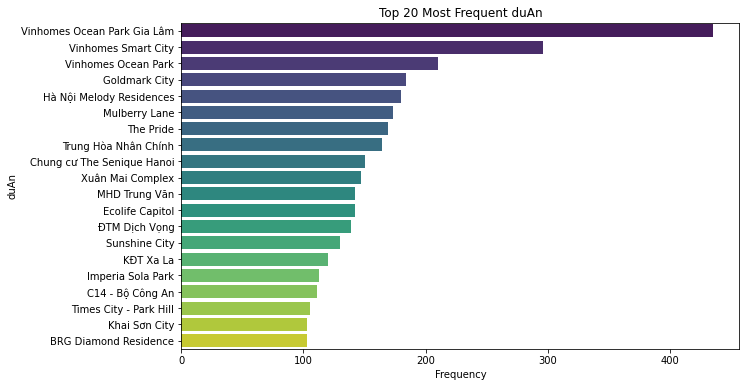

In [13]:
duAn_counts = df['duAn'].value_counts()

### Option 1: Plot the Top N Most Frequent 'duAn'
top_n = 20  # choose the top N most frequent
top_duAn_counts = duAn_counts.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_duAn_counts.values, y=top_duAn_counts.index, palette="viridis")
plt.xlabel('Frequency')
plt.ylabel('duAn')
plt.title(f'Top {top_n} Most Frequent duAn')
plt.show()

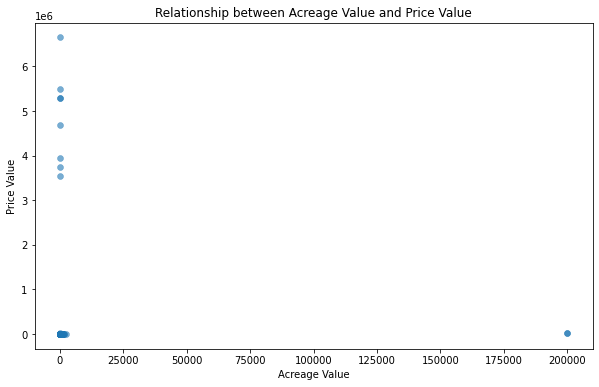

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acreage_value', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('Acreage Value')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value')
plt.show()

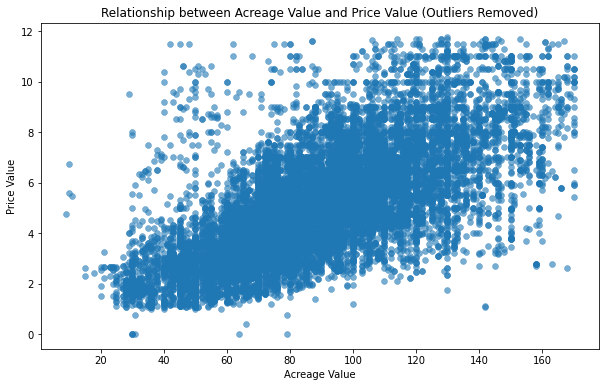

In [15]:
df_clean = df.dropna(subset=['price_value', 'acreage_value'])

# Calculate IQR to remove outliers
Q1_price = df_clean['price_value'].quantile(0.25)
Q3_price = df_clean['price_value'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_acreage = df_clean['acreage_value'].quantile(0.25)
Q3_acreage = df_clean['acreage_value'].quantile(0.75)
IQR_acreage = Q3_acreage - Q1_acreage

# Define bounds to filter out outliers
price_lower_bound = Q1_price - 1.5 * IQR_price
price_upper_bound = Q3_price + 1.5 * IQR_price

acreage_lower_bound = Q1_acreage - 1.5 * IQR_acreage
acreage_upper_bound = Q3_acreage + 1.5 * IQR_acreage

# Filter out outliers
df_filtered = df_clean[(df_clean['price_value'] >= price_lower_bound) & 
                       (df_clean['price_value'] <= price_upper_bound) & 
                       (df_clean['acreage_value'] >= acreage_lower_bound) & 
                       (df_clean['acreage_value'] <= acreage_upper_bound)]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='acreage_value', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('Acreage Value')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value (Outliers Removed)')
plt.show()

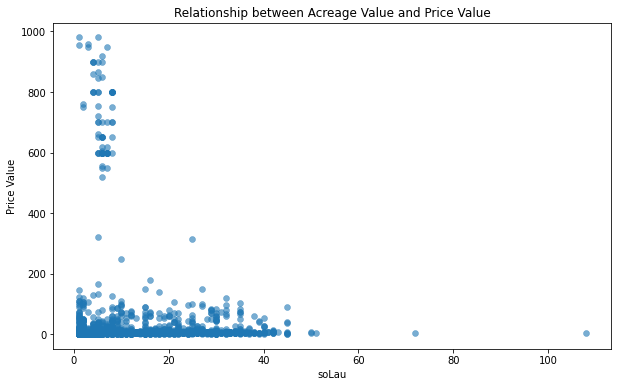

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='soLau', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('soLau')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value')
plt.show()

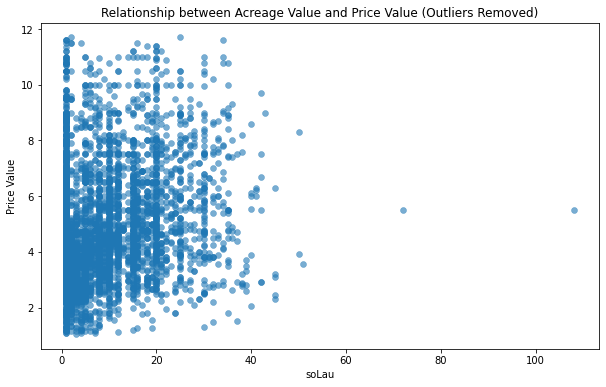

In [17]:
df_clean = df.dropna(subset=['price_value', 'acreage_value'])

# Calculate IQR to remove outliers
Q1_price = df_clean['price_value'].quantile(0.25)
Q3_price = df_clean['price_value'].quantile(0.75)
IQR_price = Q3_price - Q1_price


# Define bounds to filter out outliers
price_lower_bound = Q1_price - 1.5 * IQR_price
price_upper_bound = Q3_price + 1.5 * IQR_price


# Filter out outliers
df_filtered = df_clean[(df_clean['price_value'] >= price_lower_bound) & 
                       (df_clean['price_value'] <= price_upper_bound)]
                       

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='soLau', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('soLau')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value (Outliers Removed)')
plt.show()

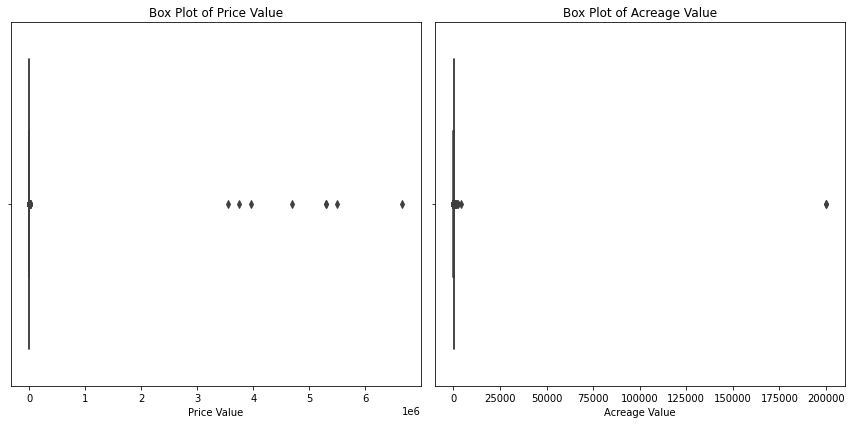

In [18]:
plt.figure(figsize=(12, 6))

# Box plot for price_value
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.boxplot(data=df, x='price_value')
plt.xlabel('Price Value')
plt.title('Box Plot of Price Value')

# Box plot for acreage_value
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(data=df, x='acreage_value')
plt.xlabel('Acreage Value')
plt.title('Box Plot of Acreage Value')

# Display the plots
plt.tight_layout()
plt.show()

## Processing data
Cột price_value:
- loại bỏ null + giá trị = 0
- chuyển đơn vị về giá tỷ đồng -> các cột tương ứng có đơn vị là triệu ở cột price_unit chuyển về tỷ -> drop cột price unit
- loại bỏ outlier

Cột acreage_unit: bỏ

Cột value: Loại bỏ outlier

Cột city: bỏ

Cột district: nếu không có district bỏ luôn

In [19]:
df_clean = df.copy()
df_clean.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,City,acreage_value,acreage_unit,price_value,price_unit,noBathroom
0,Vinhomes Ocean Park,Đông Bắc,NaN,NaN,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,Hà Nội,68.0,m2,3.72,tỷ,NaN
1,Đường Trích Sài,NaN,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Trích Sài,Phường Thụy Khuê,Quận Tây Hồ,Hà Nội,52.0,m2,1.28,tỷ,NaN
2,Vinhomes Smart City,NaN,NaN,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,75.0,m2,4.80,tỷ,NaN
3,Vinhomes Cổ Loa,NaN,NaN,NaN,NaN,NaN,Xã Cổ Loa,Huyện Đông Anh,Hà Nội,31.0,m2,3.00,tỷ,NaN
4,Vinhomes Smart City,Đông Bắc,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,28.0,m2,2.15,tỷ,NaN


#### price_value: remove 0s and null values


In [20]:
df_clean = df_clean[(df_clean['price_value'].notnull()) & (df_clean['price_value'] != 0)]

# Display the number of rows remaining
print(f"Number of rows after cleaning: {df_clean.shape[0]}")

Number of rows after cleaning: 21746


#### price_value: convert then drop price_unit (now only contains 'billion')

In [21]:
df_clean.loc[df_clean['price_unit'] == 'triệu', 'price_value'] /= 1000

# Drop the price_unit column
df_clean = df_clean.drop(columns=['price_unit'])

In [22]:
df_clean.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,City,acreage_value,acreage_unit,price_value,noBathroom
0,Vinhomes Ocean Park,Đông Bắc,NaN,NaN,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,Hà Nội,68.0,m2,3.72,NaN
1,Đường Trích Sài,NaN,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Trích Sài,Phường Thụy Khuê,Quận Tây Hồ,Hà Nội,52.0,m2,1.28,NaN
2,Vinhomes Smart City,NaN,NaN,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,75.0,m2,4.80,NaN
3,Vinhomes Cổ Loa,NaN,NaN,NaN,NaN,NaN,Xã Cổ Loa,Huyện Đông Anh,Hà Nội,31.0,m2,3.00,NaN
4,Vinhomes Smart City,Đông Bắc,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,28.0,m2,2.15,NaN


In [23]:
# df_clean.to_csv("test_data.csv", index=False)

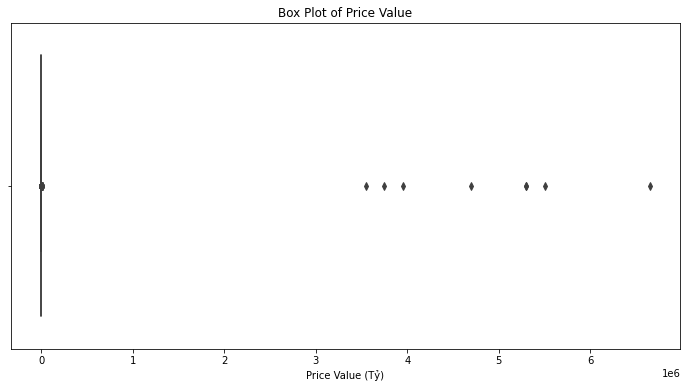

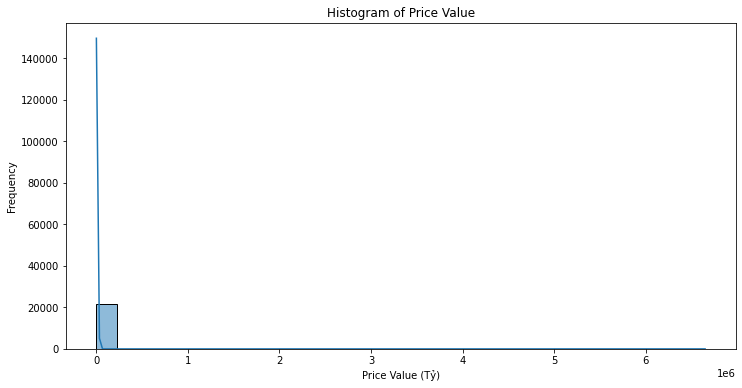

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='price_value')
plt.title('Box Plot of Price Value')
plt.xlabel('Price Value (Tỷ)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean, x='price_value', kde=True, bins=30)
plt.title('Histogram of Price Value')
plt.xlabel('Price Value (Tỷ)')
plt.ylabel('Frequency')
plt.show()

In [25]:
price_value_counts = df_clean['price_value'].value_counts().head(10)

# Convert to a DataFrame for better readability
top_price_values = price_value_counts.reset_index()
top_price_values.columns = ['price_value', 'frequency']

# Display the top values with their frequencies
print("Top Price Values with Frequency:")
print(top_price_values)

Top Price Values with Frequency:
   price_value  frequency
0          4.5        399
1          5.0        396
2          5.5        385
3          4.0        380
4          6.0        377
5          6.5        349
6          3.5        327
7          4.2        295
8          7.0        265
9          3.0        263


In [26]:
price_value_counts = df_clean['price_value'].value_counts()

# Sort by the price_value in descending order
top_price_values = price_value_counts.sort_index(ascending=False).head(20)

# Convert to a DataFrame for better readability
top_price_values_df = top_price_values.reset_index()
top_price_values_df.columns = ['price_value', 'frequency']

# Display the top values and their frequencies
print("Top Largest Price Values with Frequency:")
print(top_price_values_df)

Top Largest Price Values with Frequency:
    price_value  frequency
0     6650000.0          1
1     5500000.0          1
2     5300000.0          2
3     4695000.0          1
4     3950000.0          1
5     3750000.0          1
6     3550000.0          1
7       14000.0          1
8       13800.0          1
9       13600.0          1
10       8250.0          1
11       7689.0          1
12       6900.0          1
13       6450.0          1
14       6200.0          1
15       6000.0          1
16       5400.0          1
17       5200.0          1
18       4800.0          1
19       4050.0          1


In [27]:
price_value_counts = df_clean['price_value'].value_counts()

# Sort by the price_value in descending order
top_price_values = price_value_counts.sort_index(ascending=True).head(20)

# Convert to a DataFrame for better readability
top_price_values_df = top_price_values.reset_index()
top_price_values_df.columns = ['price_value', 'frequency']

# Display the top values and their frequencies
print("Top smallest Price Values with Frequency:")
print(top_price_values_df)

Top smallest Price Values with Frequency:
    price_value  frequency
0       0.00040          1
1       0.00074          1
2       0.00075          1
3       0.00110          1
4       0.00156          1
5       0.00228          1
6       0.00250          3
7       0.00260          1
8       0.00265          1
9       0.00270          2
10      0.00277          2
11      0.00300          1
12      0.00340          1
13      0.00360          1
14      0.00368          1
15      0.00385          1
16      0.00439          1
17      0.00458          1
18      0.00480          1
19      0.00495          1


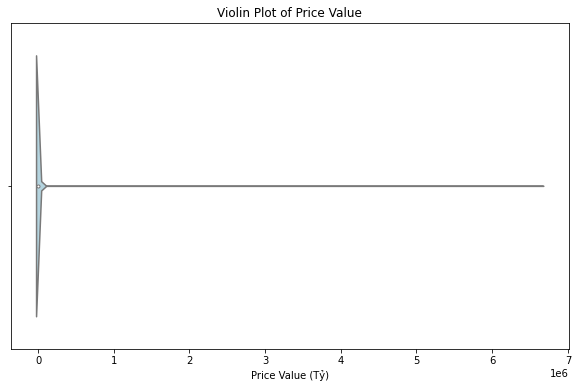

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_clean, x='price_value', color='lightblue')
plt.title('Violin Plot of Price Value')
plt.xlabel('Price Value (Tỷ)')
plt.show()

In [29]:
df_price = df_clean[df_clean['price_value'] <= 100]
print(f"Number of rows after cleaning: {df_price.shape[0]}")

Number of rows after cleaning: 21689


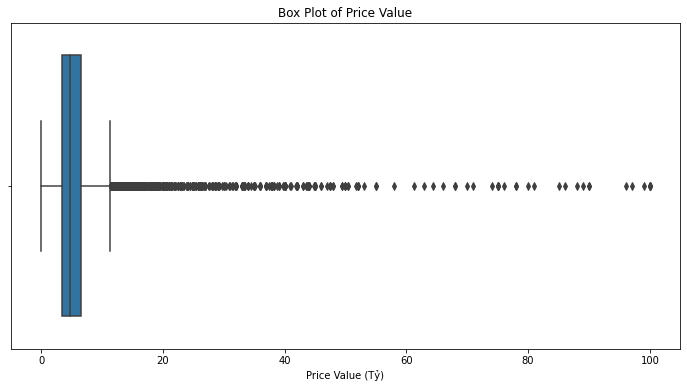

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_price, x='price_value')
plt.title('Box Plot of Price Value')
plt.xlabel('Price Value (Tỷ)')
plt.show()

In [31]:
Q1 = df_clean['price_value'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_clean['price_value'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                          # Interquartile range

# Define the lower and upper bounds
lower_bound = 0.1
upper_bound = Q3 + 1.09 * IQR

print(lower_bound, upper_bound)
# Remove rows with outliers
df_no_outliers = df_clean[(df_clean['price_value'] >= lower_bound) & (df_clean['price_value'] <= upper_bound)]

# Display the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_clean)}")

0.1 10.1425
Number of rows before removing outliers: 24942
Number of rows after removing outliers: 21746


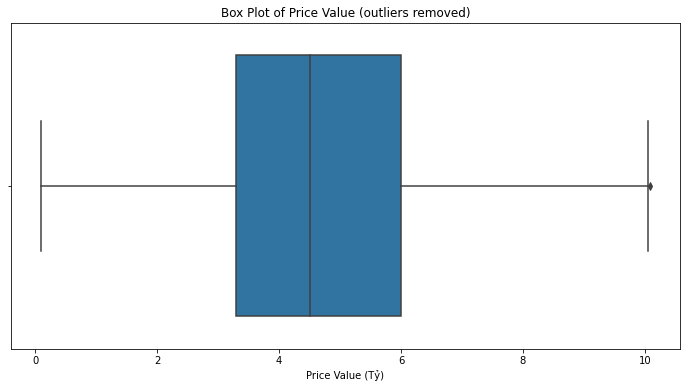

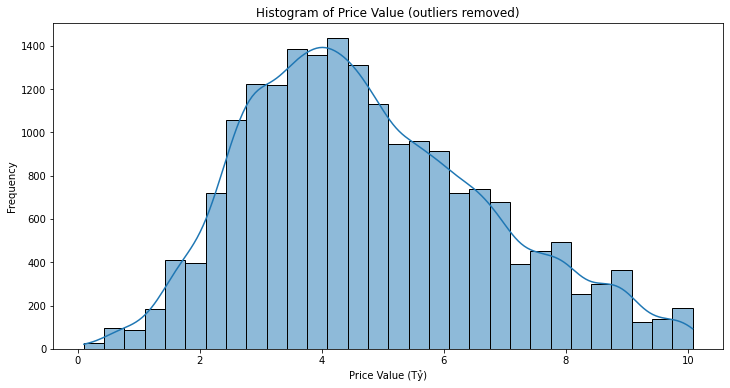

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='price_value')
plt.title('Box Plot of Price Value (outliers removed)')
plt.xlabel('Price Value (Tỷ)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_no_outliers, x='price_value', kde=True, bins=30)
plt.title('Histogram of Price Value (outliers removed)')
plt.xlabel('Price Value (Tỷ)')
plt.ylabel('Frequency')
plt.show()

In [33]:
price_value_counts = df_no_outliers['price_value'].value_counts()

# Sort by the price_value in descending order
top_price_values = price_value_counts.sort_index(ascending=False).head(20)

# Convert to a DataFrame for better readability
top_price_values_df = top_price_values.reset_index()
top_price_values_df.columns = ['price_value', 'frequency']

# Display the top values and their frequencies
print("Top Largest Price Values with Frequency:")
print(top_price_values_df)

Top Largest Price Values with Frequency:
    price_value  frequency
0         10.08          1
1         10.05          2
2         10.03          1
3         10.00        124
4          9.99          1
5          9.97          2
6          9.95          1
7          9.90         17
8          9.86          1
9          9.85          3
10         9.84          1
11         9.81          1
12         9.80         28
13         9.78          1
14         9.76          1
15         9.75          4
16         9.72          1
17         9.70         21
18         9.68          3
19         9.65          4


In [34]:
# df_final = df_no_outliers.copy()

### acreage_value

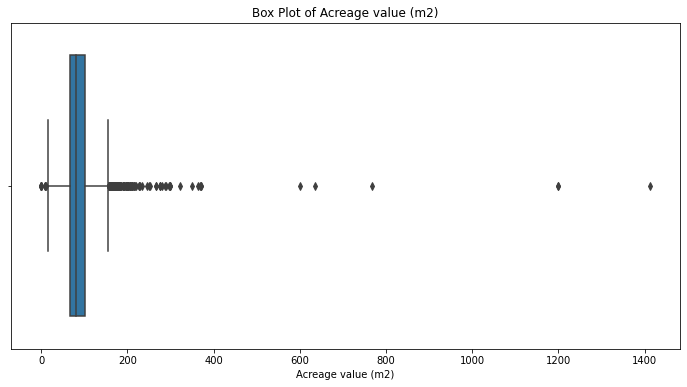

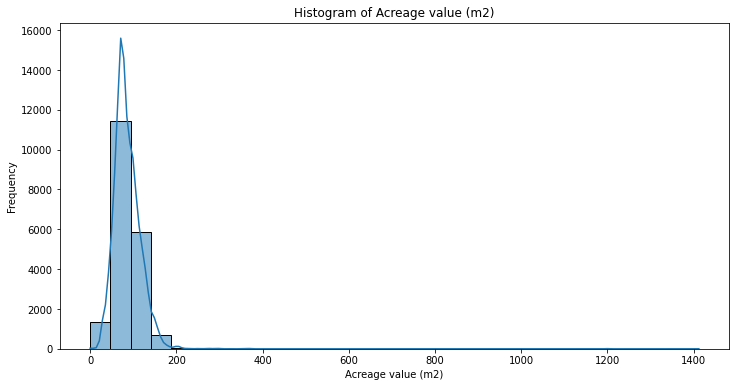

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='acreage_value')
plt.title('Box Plot of Acreage value (m2)')
plt.xlabel('Acreage value (m2)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_no_outliers, x='acreage_value', kde=True, bins=30)
plt.title('Histogram of Acreage value (m2)')
plt.xlabel('Acreage value (m2)')
plt.ylabel('Frequency')
plt.show()

In [36]:
Q1_a = df_no_outliers['acreage_value'].quantile(0.25)  # First quartile (25th percentile)
Q3_a = df_no_outliers['acreage_value'].quantile(0.75)  # Third quartile (75th percentile)
IQR_a = Q3_a - Q1_a                          # Interquartile range

# Define the lower and upper bounds
lower_bound_a = Q1_a - 1.5 * IQR_a
upper_bound_a = Q3_a + 1.5 * IQR_a

print(lower_bound_a, upper_bound_a)
# Remove rows with outliers
df_no_outliers = df_no_outliers[(df_no_outliers['acreage_value'] >= lower_bound_a) & (df_no_outliers['acreage_value'] <= upper_bound_a)]

# Display the number of rows before and after removing outliers
# print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

12.0 156.0
Number of rows after removing outliers: 19114


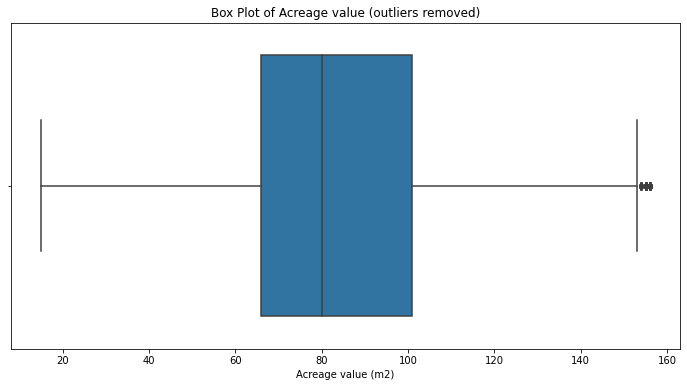

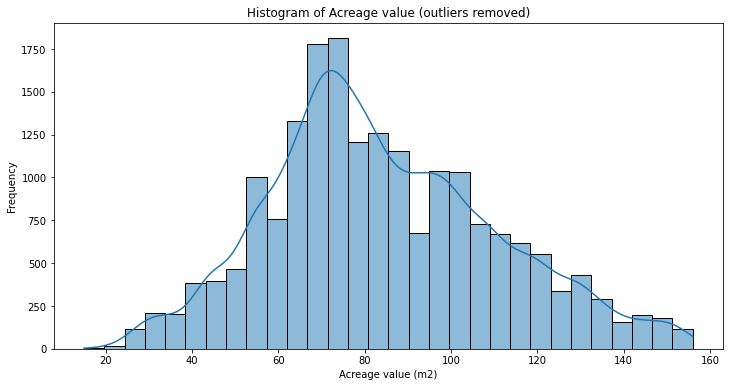

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='acreage_value')
plt.title('Box Plot of Acreage value (outliers removed)')
plt.xlabel('Acreage value (m2)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_no_outliers, x='acreage_value', kde=True, bins=30)
plt.title('Histogram of Acreage value (outliers removed)')
plt.xlabel('Acreage value (m2)')
plt.ylabel('Frequency')
plt.show()

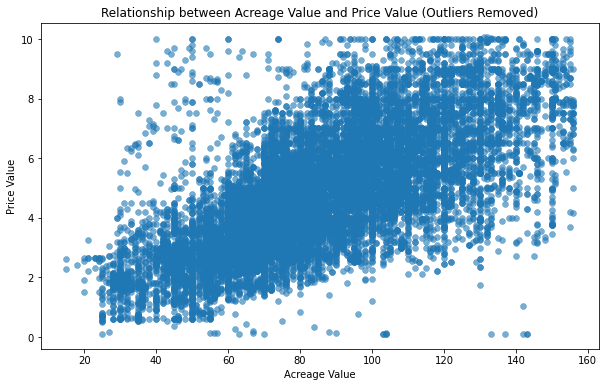

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='acreage_value', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('Acreage Value')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value (Outliers Removed)')
plt.show()

#### drop acreage_unit

In [39]:
acreage_unit_counts = df_no_outliers['acreage_unit'].value_counts()

# Display the result
print("Unique values in acreage_unit and their counts:")
print(acreage_unit_counts)

Unique values in acreage_unit and their counts:
m2    19114
Name: acreage_unit, dtype: int64


In [40]:
df_no_outliers = df_no_outliers.drop(columns=['acreage_unit'])

In [41]:
City_unit_counts = df_no_outliers['City'].value_counts()

# Display the result
print("Unique values in acreage_unit and their counts:")
print(City_unit_counts)

Unique values in acreage_unit and their counts:
Hà Nội    19114
Name: City, dtype: int64


In [42]:
df_no_outliers = df_no_outliers.drop(columns=['City'])

In [43]:
df_no_outliers.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,acreage_value,price_value,noBathroom
0,Vinhomes Ocean Park,Đông Bắc,NaN,NaN,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,68.0,3.72,NaN
1,Đường Trích Sài,NaN,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Trích Sài,Phường Thụy Khuê,Quận Tây Hồ,52.0,1.28,NaN
2,Vinhomes Smart City,NaN,NaN,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,75.0,4.80,NaN
3,Vinhomes Cổ Loa,NaN,NaN,NaN,NaN,NaN,Xã Cổ Loa,Huyện Đông Anh,31.0,3.00,NaN
4,Vinhomes Smart City,Đông Bắc,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,28.0,2.15,NaN


#### check if any of District is missing

In [44]:
dist_null = df_no_outliers['District'].isnull().sum()
dist_null


132

In [45]:
df_no_outliers = df_no_outliers.dropna(subset=['District'])
df_no_outliers.shape[0]

18982

In [46]:
dist_null = df_no_outliers['District'].isnull().sum()
dist_null

0

In [47]:
filtered_df = df_no_outliers[(df_no_outliers['price_value'] < 1) & (df_no_outliers['acreage_value'] > 140)]

# Display the filtered DataFrame
print(filtered_df[['price_value', 'acreage_value']])

      price_value  acreage_value
6664          0.1          142.0


In [48]:
df_no_outliers = df_no_outliers[~((df_no_outliers['price_value'] < 1) & (df_no_outliers['acreage_value'] > 140))]

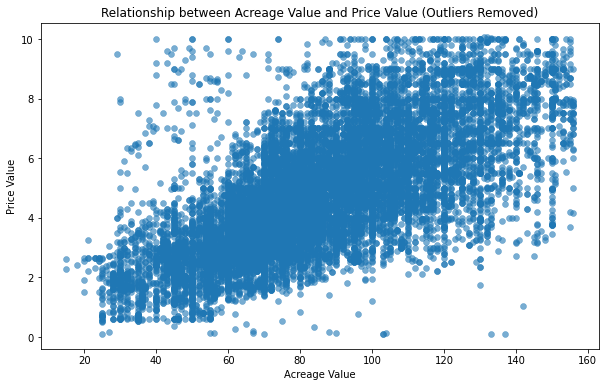

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='acreage_value', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('Acreage Value')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value (Outliers Removed)')
plt.show()

In [50]:
df_no_outliers.shape[0]

18981

### check for noBed outliers

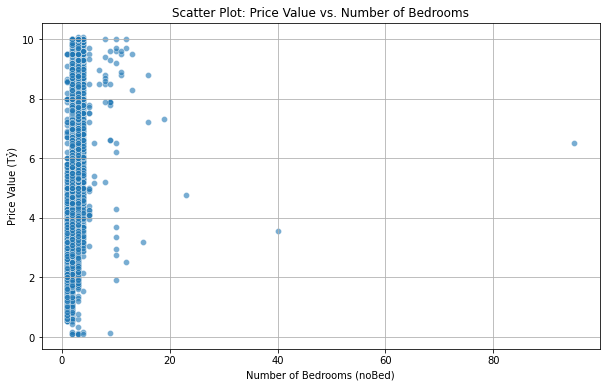

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='noBed', y='price_value', alpha=0.6)
plt.title('Scatter Plot: Price Value vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms (noBed)')
plt.ylabel('Price Value (Tỷ)')
plt.grid(True)
plt.show()

In [52]:
df_no_outliers = df_no_outliers[~(df_no_outliers['noBed'] > 25)]

### check for soLau outliers

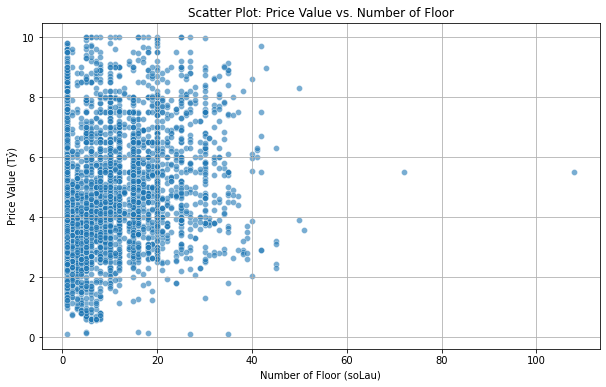

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='soLau', y='price_value', alpha=0.6)
plt.title('Scatter Plot: Price Value vs. Number of Floor')
plt.xlabel('Number of Floor (soLau)')
plt.ylabel('Price Value (Tỷ)')
plt.grid(True)
plt.show()

In [54]:
df_no_outliers = df_no_outliers[~(df_no_outliers['soLau'] > 100)]

### check for noBathroom outliers

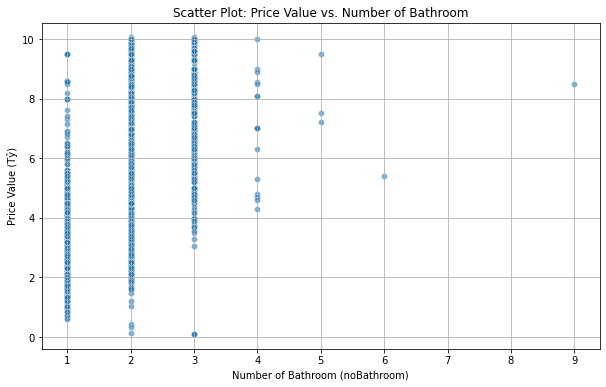

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='noBathroom', y='price_value', alpha=0.6)
plt.title('Scatter Plot: Price Value vs. Number of Bathroom')
plt.xlabel('Number of Bathroom (noBathroom)')
plt.ylabel('Price Value (Tỷ)')
plt.grid(True)
plt.show()

## Summary
Raw data samples: 24942 <br />
After removing outliers: 18978 <br />

In [78]:
df_no_outliers.shape[0]

18978

In [57]:
df_no_outliers.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,acreage_value,price_value,noBathroom
0,Vinhomes Ocean Park,Đông Bắc,NaN,NaN,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,68.0,3.72,NaN
1,Đường Trích Sài,NaN,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Trích Sài,Phường Thụy Khuê,Quận Tây Hồ,52.0,1.28,NaN
2,Vinhomes Smart City,NaN,NaN,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,75.0,4.80,NaN
3,Vinhomes Cổ Loa,NaN,NaN,NaN,NaN,NaN,Xã Cổ Loa,Huyện Đông Anh,31.0,3.00,NaN
4,Vinhomes Smart City,Đông Bắc,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,28.0,2.15,NaN


In [58]:
df_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
noBed,17810.0,2.445031,0.775513,1.0,2.0,2.0,3.0,23.00
soLau,4269.0,8.760834,9.032649,1.0,1.0,5.0,15.0,72.00
acreage_value,18978.0,84.212882,26.357377,15.0,66.0,80.0,101.0,156.00
price_value,18978.0,4.740971,1.939667,0.1,3.3,4.5,6.0,10.05
noBathroom,10190.0,1.893229,0.441697,1.0,2.0,2.0,2.0,9.00


In [59]:
null_values_per_feature = df_no_outliers.isnull().sum()

# Display the result
print("Number of null values for each feature:")
print(null_values_per_feature)

Number of null values for each feature:
duAn              6482
huong            17304
phapLy           14841
noBed             1168
soLau            14709
Street            6385
Precinct          3598
District             0
acreage_value        0
price_value          0
noBathroom        8788
dtype: int64


## Numerical features


### noBed

In [60]:
bed_counts = df_no_outliers['noBed'].value_counts().reset_index()
bed_counts.columns = ['noBed', 'Frequency']
bed_counts['Percentage'] = (bed_counts['Frequency'] / len(df)) * 100

# Display the result
print(bed_counts)

    noBed  Frequency  Percentage
0     2.0       8689   34.836821
1     3.0       7657   30.699222
2     1.0        995    3.989255
3     4.0        399    1.599711
4     5.0         21    0.084195
5    10.0         12    0.048112
6     9.0         10    0.040093
7     8.0          8    0.032074
8    11.0          4    0.016037
9     6.0          3    0.012028
10   12.0          3    0.012028
11    7.0          2    0.008019
12   16.0          2    0.008019
13   13.0          2    0.008019
14   19.0          1    0.004009
15   23.0          1    0.004009
16   15.0          1    0.004009


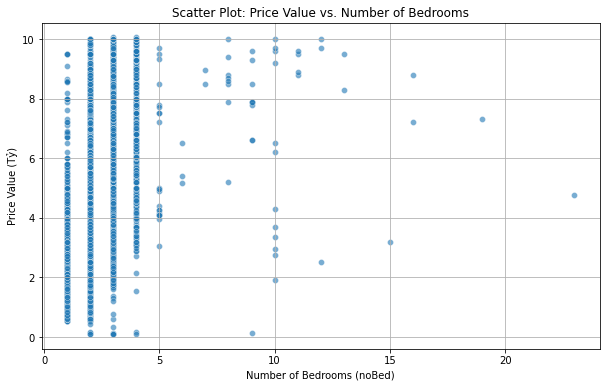

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='noBed', y='price_value', alpha=0.6)
plt.title('Scatter Plot: Price Value vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms (noBed)')
plt.ylabel('Price Value (Tỷ)')
plt.grid(True)
plt.show()

### soLau

In [62]:
soLau_counts = df_no_outliers['soLau'].value_counts().reset_index()
soLau_counts.columns = ['soLau', 'Frequency']
soLau_counts['Percentage'] = (soLau_counts['Frequency'] / len(df)) * 100

# Display the result
print(soLau_counts)

    soLau  Frequency  Percentage
0     1.0       1338    5.364446
1    10.0        252    1.010344
2     5.0        248    0.994307
3     2.0        229    0.918130
4     3.0        203    0.813888
5    15.0        177    0.709646
6     8.0        174    0.697618
7    12.0        160    0.641488
8     6.0        151    0.605405
9    20.0        151    0.605405
10    4.0        147    0.589367
11   16.0        107    0.428995
12    7.0         91    0.364846
13    9.0         81    0.324753
14   18.0         81    0.324753
15   25.0         70    0.280651
16   11.0         61    0.244567
17   30.0         57    0.228530
18   19.0         52    0.208484
19   17.0         48    0.192446
20   21.0         44    0.176409
21   14.0         36    0.144335
22   27.0         33    0.132307
23   22.0         33    0.132307
24   24.0         27    0.108251
25   13.0         26    0.104242
26   23.0         22    0.088205
27   35.0         21    0.084195
28   32.0         19    0.076177
29   26.0 

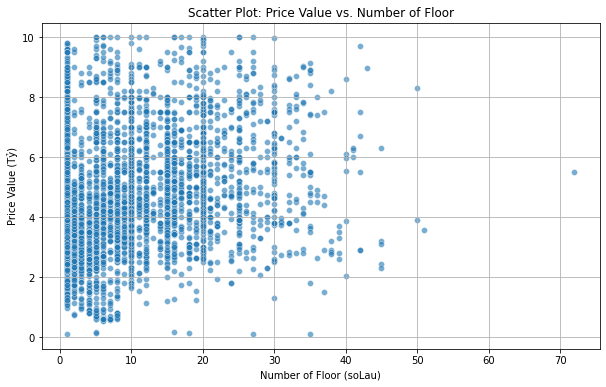

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='soLau', y='price_value', alpha=0.6)
plt.title('Scatter Plot: Price Value vs. Number of Floor')
plt.xlabel('Number of Floor (soLau)')
plt.ylabel('Price Value (Tỷ)')
plt.grid(True)
plt.show()

### noBathroom

In [64]:
noBathroom_counts = df_no_outliers['noBathroom'].value_counts().reset_index()
noBathroom_counts.columns = ['noBathroom', 'Frequency']
noBathroom_counts['Percentage'] = (noBathroom_counts['Frequency'] / len(df)) * 100

# Display the result
print(noBathroom_counts)

   noBathroom  Frequency  Percentage
0         2.0       8221   32.960468
1         1.0       1544    6.190362
2         3.0        404    1.619758
3         4.0         16    0.064149
4         5.0          3    0.012028
5         9.0          1    0.004009
6         6.0          1    0.004009


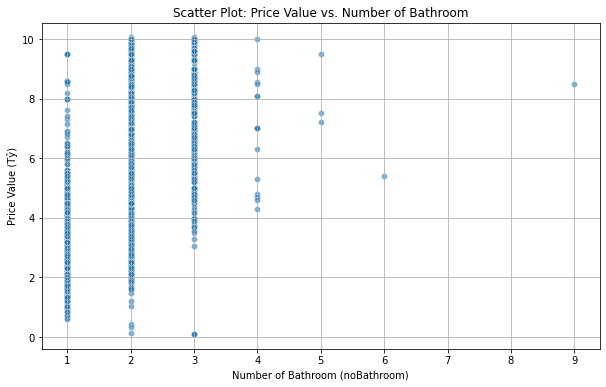

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='noBathroom', y='price_value', alpha=0.6)
plt.title('Scatter Plot: Price Value vs. Number of Bathroom')
plt.xlabel('Number of Bathroom (noBathroom)')
plt.ylabel('Price Value (Tỷ)')
plt.grid(True)
plt.show()

### price_value and acreage_value are already analysed in the previous part

## Categorical features


### duAn

In [66]:
duAn_counts = df_no_outliers['duAn'].value_counts().reset_index()
duAn_counts.columns = ['duAn', 'Frequency']
duAn_counts['Percentage'] = (duAn_counts['Frequency'] / len(df)) * 100

# Display the result
print(duAn_counts)

                            duAn  Frequency  Percentage
0    Vinhomes Ocean Park Gia Lâm        388    1.555609
1            Vinhomes Smart City        270    1.082511
2            Vinhomes Ocean Park        165    0.661535
3                  Goldmark City        154    0.617432
4                Ecolife Capitol        129    0.517200
..                           ...        ...         ...
915       N01-T7 Ngoại Giao Đoàn          1    0.004009
916               Đường Giáp Bát          1    0.004009
917             Phố Vũ Tông Phan          1    0.004009
918                Xã Đức Thượng          1    0.004009
919            Sunny Garden City          1    0.004009

[920 rows x 3 columns]


### huong

In [67]:
huong_counts = df_no_outliers['huong'].value_counts().reset_index()
huong_counts.columns = ['huong', 'Frequency']
huong_counts['Percentage'] = (huong_counts['Frequency'] / len(df)) * 100

# Display the result
print(huong_counts)

      huong  Frequency  Percentage
0       Nam        342    1.371181
1      Đông        304    1.218828
2       Tây        265    1.062465
3       Bắc        261    1.046428
4  Đông Nam        236    0.946195
5  Đông Bắc        100    0.400930
6   Tây Bắc         85    0.340791
7   Tây Nam         81    0.324753


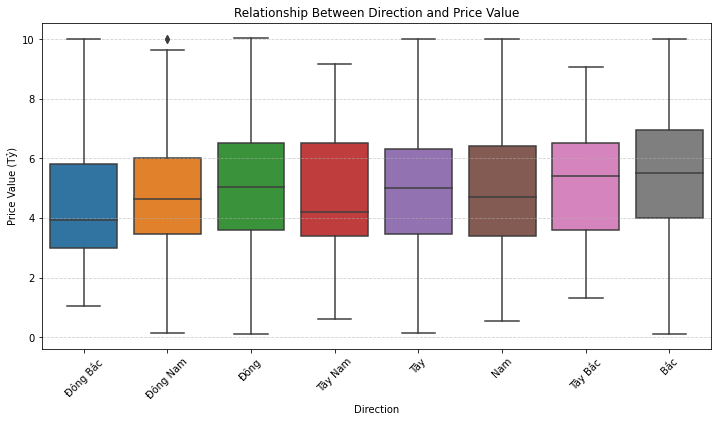

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='huong', y='price_value')
plt.title('Relationship Between Direction and Price Value')
plt.xlabel('Direction')
plt.ylabel('Price Value (Tỷ)')
plt.xticks(rotation=45)  # Rotate District labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Street

In [69]:
Street_counts = df_no_outliers['Street'].value_counts().reset_index()
Street_counts.columns = ['Street', 'Frequency']
Street_counts['Percentage'] = (Street_counts['Frequency'] / len(df)) * 100

# Display the result
print(Street_counts)

                  Street  Frequency  Percentage
0           Đường Tố Hữu        964    3.864967
1        Đường Phạm Hùng        330    1.323070
2    Đường Phạm Văn Đồng        319    1.278967
3      Đường Nguyễn Trãi        263    1.054446
4     Đường Lê Văn Lương        256    1.026381
..                   ...        ...         ...
653        Đường Tây Trà          1    0.004009
654      Đường Đại Thanh          1    0.004009
655        Đường Trần Vĩ          1    0.004009
656  Phố Phạm Khắc Quảng          1    0.004009
657  Đường Trần Khánh Dư          1    0.004009

[658 rows x 3 columns]


### Precinct

In [70]:
Precinct_counts = df_no_outliers['Precinct'].value_counts().reset_index()
Precinct_counts.columns = ['Precinct', 'Frequency']
Precinct_counts['Percentage'] = (Precinct_counts['Frequency'] / len(df)) * 100

# Display the result
print(Precinct_counts)

              Precinct  Frequency  Percentage
0     Phường Mỹ Đình 2        686    2.750381
1        Phường Tây Mỗ        578    2.317376
2     Phường Trung Hòa        576    2.309358
3    Phường Hoàng Liệt        567    2.273274
4          Xã Dương Xá        563    2.257237
..                 ...        ...         ...
203         Xã Kiêu Kỵ          1    0.004009
204        Xã Ngọc Hồi          1    0.004009
205       Xã Bát Tràng          1    0.004009
206  Phường Thượng Cát          1    0.004009
207         Xã Sài Sơn          1    0.004009

[208 rows x 3 columns]


### phapLy

In [71]:
phapLy_counts = df_no_outliers['phapLy'].value_counts().reset_index()
phapLy_counts.columns = ['phapLy', 'Frequency']
phapLy_counts['Percentage'] = (District_counts['Frequency'] / len(df)) * 100

# Display the result
print(phapLy_counts)

                             phapLy  Frequency  Percentage
0  Giấy chứng nhận quyền sở hữu đất       3941   20.238954
1                    Giấy tờ hợp lệ        196   12.725523


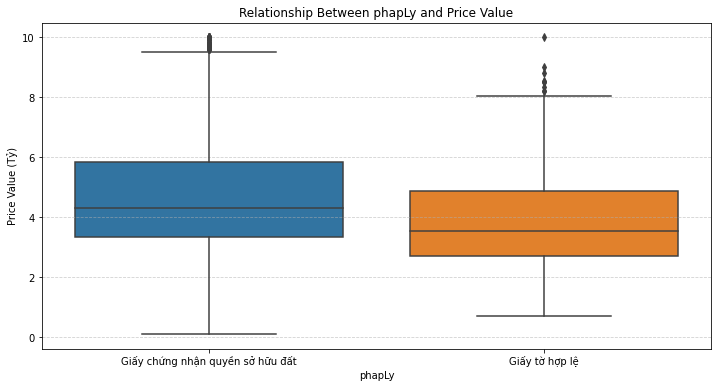

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='phapLy', y='price_value')
plt.title('Relationship Between phapLy and Price Value')
plt.xlabel('phapLy')
plt.ylabel('Price Value (Tỷ)')
plt.xticks()  # Rotate District labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### District

In [73]:
District_counts = df_no_outliers['District'].value_counts().reset_index()
District_counts.columns = ['District', 'Frequency']
District_counts['Percentage'] = (District_counts['Frequency'] / len(df)) * 100

# Display the result
print(District_counts)

               District  Frequency  Percentage
0      Quận Nam Từ Liêm       4122   16.526341
1         Quận Cầu Giấy       2363    9.473980
2          Quận Hà Đông       2278    9.133189
3        Quận Hoàng Mai       2106    8.443589
4       Quận Thanh Xuân       1835    7.357068
5      Quận Bắc Từ Liêm       1086    4.354102
6         Huyện Gia Lâm       1005    4.029348
7          Quận Đống Đa        880    3.528185
8        Quận Long Biên        868    3.480074
9     Quận Hai Bà Trưng        678    2.718306
10          Quận Tây Hồ        448    1.796167
11         Quận Ba Đình        387    1.551600
12      Huyện Thanh Trì        335    1.343116
13       Huyện Hoài Đức        293    1.174725
14       Huyện Đông Anh        142    0.569321
15       Quận Hoàn Kiếm         59    0.236549
16     Huyện Đan Phượng         44    0.176409
17     Huyện Thạch Thất         19    0.076177
18      Huyện Thanh Oai         14    0.056130
19      Huyện Chương Mỹ          5    0.020047
20       Huyệ

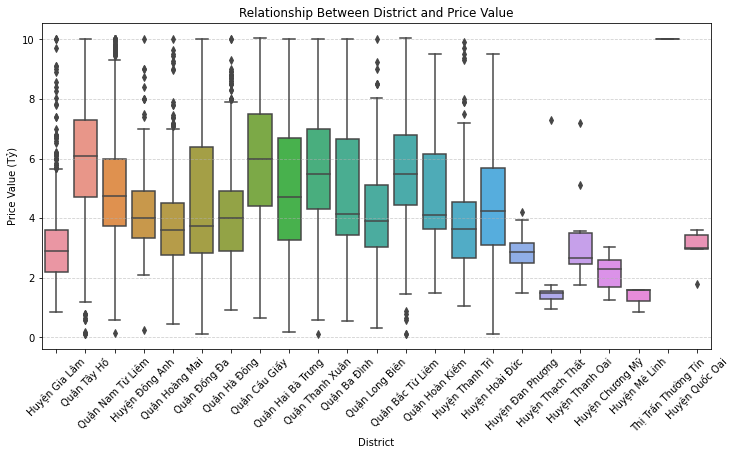

In [74]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='District', y='price_value')
plt.title('Relationship Between District and Price Value')
plt.xlabel('District')
plt.ylabel('Price Value (Tỷ)')
plt.xticks(rotation=45)  # Rotate District labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [76]:
df_no_outliers.to_csv('..\\..\\data\\normalized\\clean_dataset.csv', index = False)

## processing duAn

In [77]:
unique_duan_values = df_no_outliers['duAn'].unique()
unique_duan_values

array(['Vinhomes Ocean Park', 'Đường Trích Sài', 'Vinhomes Smart City',
       'Vinhomes Cổ Loa', 'Tòa nhà Licogi 12', 'VP3 Linh Đàm',
       'Phường Mỹ Đình 2', 'Quận Hoàng Mai', 'Quận Đống Đa',
       'Phường Hoàng Liệt', 'Đường Trần Phú',
       'Nhà ở xã hội Rice City Tây Nam Linh Đàm',
       'Khu đô thị Trung Hòa - Nhân Chính', 'Phố Trần Quý Kiên',
       'Quận Hà Đông', 'Rainbow Linh Đàm', 'đường Tây Mỗ', 'Phố Xã Đàn',
       'Phố Chùa Bộc', 'Phường Phú La', 'Phường Dương Nội',
       'Đường Đại Cồ Việt', 'Đường Nguyễn Trãi', 'Đường Phạm Ngọc Thạch',
       'Đường Giải Phóng', 'Đường Phạm Hùng', 'Đường Vĩnh Phúc',
       'Đường Đông Tác', 'Đường Mễ Trì Hạ', 'Phường Thượng Đình',
       'Đường Đại lộ Thăng Long', 'Phường Giang Biên', 'HC Golden City',
       'Eco City Việt Hưng', 'Phố Bạch Mai', 'Phố Hồng Mai',
       'Đường Phan Đình Giót', 'Đường Hồ Ba Mẫu', 'Đường Trung Phụng',
       'Đường Đội Cấn', 'Đường Phúc La', 'Đường Trần Khát Chân',
       'Phường Phúc La', 'Đường Hồ 

### to do: handle duAn and missing values